In [1]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

     |████████████████████████████████| 9.9 MB 8.4 MB/s eta 0:00:01
     |████████████████████████████████| 510 kB 16.9 MB/s eta 0:00:01
     |████████████████████████████████| 14.5 MB 44.6 MB/s eta 0:00:01
     |████████████████████████████████| 11.6 MB 7.6 MB/s eta 0:00:01
     |████████████████████████████████| 1.1 MB 76.7 MB/s eta 0:00:01
     |████████████████████████████████| 2.2 MB 37.8 MB/s eta 0:00:01
     |████████████████████████████████| 285 kB 7.8 MB/s eta 0:00:01
     |████████████████████████████████| 27.4 MB 11.3 MB/s eta 0:00:01


In [4]:
df = pd.read_csv('mobile_train.csv')
df.describe()


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


<AxesSubplot:>

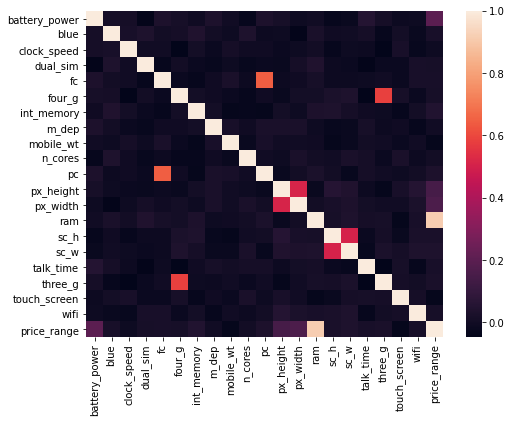

In [10]:
corr = df.corr()
plt.figure(figsize = (8,6))
sns.heatmap(corr)

In [17]:
df['bluetooth']=np.where(df["blue"]==1,'Yes','No')

In [29]:
def conv_gen(x):
    converter = {4:0,0:2,3:3,7:4}
    return converter[x]

def conv_speed(x):
    if x < 1:
        return 'low'
    elif x < 2.3:
        return 'medium'
    return 'high'

In [26]:
df['gen_tmp'] = df["four_g"]*4+df["three_g"]*3
df['gen'] = df['gen_tmp'].apply(conv_gen)
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,bluetooth,gen_tmp,gen
0,842,0,2.2,0,1,0,7,0.6,188,2,...,9,7,19,0,0,1,1,No,0,2
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,17,3,7,1,1,0,2,Yes,7,4
2,563,1,0.5,1,2,1,41,0.9,145,5,...,11,2,9,1,1,0,2,Yes,7,4
3,615,1,2.5,0,0,0,10,0.8,131,6,...,16,8,11,1,0,0,2,Yes,3,3
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,8,2,15,1,1,0,1,Yes,7,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,13,4,19,1,1,0,0,Yes,7,4
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,11,10,16,1,1,1,2,Yes,3,3
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,9,1,5,1,1,0,3,No,7,4
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,18,10,19,1,1,1,0,No,7,4


(array([413.,  74.,  64.,  58.,  58.,  61., 107.,   0.,  68.,  70.,  67.,
        136.,   0., 127.,   0.,  67.,  76.,  59., 136.,   0.,  74.,  55.,
        140.,  62.,  28.]),
 array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7,
        1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. ]),
 <BarContainer object of 25 artists>)

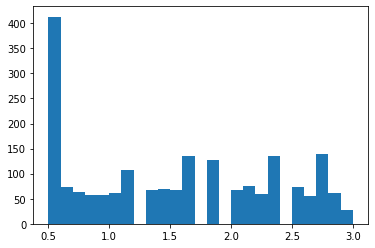

In [28]:
plt.hist(df.clock_speed,bins=25)

In [31]:
df['speed'] = df['clock_speed'].apply(conv_speed)
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,sc_w,talk_time,three_g,touch_screen,wifi,price_range,bluetooth,gen_tmp,gen,speed
0,842,0,2.2,0,1,0,7,0.6,188,2,...,7,19,0,0,1,1,No,0,2,medium
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,3,7,1,1,0,2,Yes,7,4,low
2,563,1,0.5,1,2,1,41,0.9,145,5,...,2,9,1,1,0,2,Yes,7,4,low
3,615,1,2.5,0,0,0,10,0.8,131,6,...,8,11,1,0,0,2,Yes,3,3,high
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,2,15,1,1,0,1,Yes,7,4,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,4,19,1,1,0,0,Yes,7,4,low
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,10,16,1,1,1,2,Yes,3,3,high
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,1,5,1,1,0,3,No,7,4,low
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,10,19,1,1,1,0,No,7,4,low


In [32]:
df['sim'] = np.where(df['dual_sim'] == 0, 'Single','Dual')
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,talk_time,three_g,touch_screen,wifi,price_range,bluetooth,gen_tmp,gen,speed,sim
0,842,0,2.2,0,1,0,7,0.6,188,2,...,19,0,0,1,1,No,0,2,medium,Single
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,7,1,1,0,2,Yes,7,4,low,Dual
2,563,1,0.5,1,2,1,41,0.9,145,5,...,9,1,1,0,2,Yes,7,4,low,Dual
3,615,1,2.5,0,0,0,10,0.8,131,6,...,11,1,0,0,2,Yes,3,3,high,Single
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,15,1,1,0,1,Yes,7,4,medium,Single
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,19,1,1,0,0,Yes,7,4,low,Dual
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,16,1,1,1,2,Yes,3,3,high,Dual
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,5,1,1,0,3,No,7,4,low,Dual
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,19,1,1,1,0,No,7,4,low,Single


AttributeError: 'Line2D' object has no property 'line'

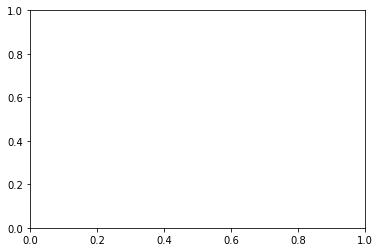

In [38]:
plt.plot(df.fc,df.price_range,marker="o",line=None)